# **Predictive ML Project**

Author: Sydney Sailors

GitHub project repository: [Data-fun-o7-ml](https://github.com/sydsailors/datfun-07-ml)

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

## Part 1 - Chart a Straight Line

Guided Project from chapter 10.16

In [2]:
%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

In [3]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [5]:
temps_df = pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])

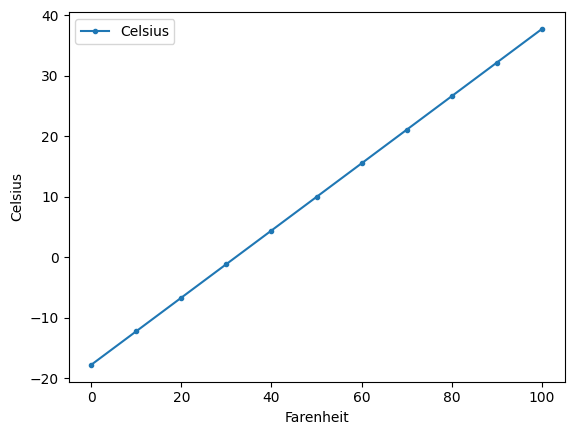

In [6]:
axes = temps_df.plot(x='Farenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [7]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [8]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [9]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [10]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

In [11]:
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [12]:
nyc_df.Date.dtype

dtype('int64')

In [13]:
nyc_df.Date = nyc_df.Date.floordiv(100)

In [14]:
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics